In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [3]:
HOURS_PER_DAY = 20
DAYS_PER_WEEK = 7
DAYS_PER_YEAR = 365

def create_dataset_years(signal_data, hours=1, days=1, weeks=1, years=1):
    num_data = len(signal_data) - HOURS_PER_DAY * DAYS_PER_YEAR * years
    x_arr, y_arr = np.zeros((num_data, 4, max(hours, days, weeks, years))), np.zeros((num_data,))
    
    for i in range(num_data):
        index = i
        
        for j in range(years):
            x_arr[i, 3, j] = signal_data[index]
            index += HOURS_PER_DAY * DAYS_PER_YEAR
            
        index -= HOURS_PER_DAY * DAYS_PER_WEEK * weeks
        
        for j in range(weeks):
            x_arr[i, 2, j] = signal_data[index]
            index += HOURS_PER_DAY * DAYS_PER_WEEK
            
        index -= HOURS_PER_DAY * days
        
        for j in range(days):
            x_arr[i, 1, j] = signal_data[index]
            index += HOURS_PER_DAY
        
        x_arr[i, 0, 0:hours] = signal_data[(index-hours):index]
        y_arr[i] = signal_data[index]

    return x_arr, y_arr

def create_model():
    model = Sequential()  
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.2)) 
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    return model

def run_model(data):
    hours = 3
    days = 4
    weeks = 5
    years = 5
    batch_size = 256
    
    # create model
    model = create_model()
    adam = keras.optimizers.Adam(lr=0.001)
    model.compile(optimizer=adam, loss='mse')
    
    # prepare data
    x_data, y_data = create_dataset_years(data, hours, days, weeks, years)
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=False)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=False)
    
    # run model
    history = model.fit(x_train, y_train, epochs=200, batch_size=batch_size, validation_data=(x_val, y_val))
    score = model.evaluate(x_test, y_test, batch_size=batch_size)

    # predict future values
    predictions = np.concatenate(model.predict(x_test, batch_size))
    #plt.plot(predictions, (predictions - y_test), 'rx')
    
    # evaluate model
    SMAPE = np.mean(abs(predictions - y_test) / (abs(predictions) + abs(y_test)))
    RMSE = np.sqrt(np.mean((predictions - y_test)**2))
    
    return SMAPE, RMSE

Now processing station number 150
Train on 22220 samples, validate on 5556 samples
Epoch 1/200
22220/22220 [==============================] - 11s 490us/step - loss: 0.0096 - val_loss: 0.0023
Epoch 2/200
22220/22220 [==============================] - 4s 176us/step - loss: 0.0028 - val_loss: 0.0018
Epoch 3/200
22220/22220 [==============================] - 4s 177us/step - loss: 0.0024 - val_loss: 0.0015
Epoch 4/200
22220/22220 [==============================] - 4s 180us/step - loss: 0.0023 - val_loss: 0.0015
Epoch 5/200
22220/22220 [==============================] - 4s 182us/step - loss: 0.0022 - val_loss: 0.0014
Epoch 6/200
22220/22220 [==============================] - 4s 181us/step - loss: 0.0022 - val_loss: 0.0014
Epoch 7/200
22220/22220 [==============================] - 4s 186us/step - loss: 0.0021 - val_loss: 0.0014
Epoch 8/200
22220/22220 [==============================] - 4s 189us/step - loss: 0.0021 - val_loss: 0.0013
Epoch 9/200
22220/22220 [==============================] - 4

22220/22220 [==============================] - 3s 145us/step - loss: 8.4110e-04 - val_loss: 4.6425e-04
Epoch 146/200
22220/22220 [==============================] - 3s 144us/step - loss: 8.1201e-04 - val_loss: 4.9182e-04
Epoch 147/200
22220/22220 [==============================] - 3s 144us/step - loss: 7.9204e-04 - val_loss: 4.9826e-04
Epoch 148/200
22220/22220 [==============================] - 3s 144us/step - loss: 7.6197e-04 - val_loss: 4.8002e-04
Epoch 149/200
22220/22220 [==============================] - 3s 144us/step - loss: 7.7507e-04 - val_loss: 4.6703e-04
Epoch 150/200
22220/22220 [==============================] - 3s 144us/step - loss: 7.6604e-04 - val_loss: 4.7644e-04
Epoch 151/200
22220/22220 [==============================] - 3s 145us/step - loss: 8.5474e-04 - val_loss: 4.9523e-04
Epoch 152/200
22220/22220 [==============================] - 3s 145us/step - loss: 7.7367e-04 - val_loss: 5.1338e-04
Epoch 153/200
22220/22220 [==============================] - 3s 145us/step - l

22220/22220 [==============================] - 4s 177us/step - loss: 2.8932e-04 - val_loss: 1.6789e-04
Epoch 85/200
22220/22220 [==============================] - 4s 179us/step - loss: 2.9416e-04 - val_loss: 1.6674e-04
Epoch 86/200
22220/22220 [==============================] - 4s 180us/step - loss: 2.7536e-04 - val_loss: 1.6825e-04
Epoch 87/200
22220/22220 [==============================] - 4s 180us/step - loss: 2.8913e-04 - val_loss: 2.2881e-04
Epoch 88/200
22220/22220 [==============================] - 4s 180us/step - loss: 2.8316e-04 - val_loss: 1.8791e-04
Epoch 89/200
22220/22220 [==============================] - 4s 178us/step - loss: 2.8197e-04 - val_loss: 2.0627e-04
Epoch 90/200
22220/22220 [==============================] - 4s 179us/step - loss: 2.7480e-04 - val_loss: 1.9009e-04
Epoch 91/200
22220/22220 [==============================] - 4s 179us/step - loss: 2.7499e-04 - val_loss: 1.9186e-04
Epoch 92/200
22220/22220 [==============================] - 4s 180us/step - loss: 2.7

Epoch 25/200
22220/22220 [==============================] - 4s 172us/step - loss: 0.0012 - val_loss: 8.4367e-04
Epoch 26/200
22220/22220 [==============================] - 4s 172us/step - loss: 0.0012 - val_loss: 7.9673e-04
Epoch 27/200
22220/22220 [==============================] - 4s 175us/step - loss: 0.0012 - val_loss: 8.6386e-04
Epoch 28/200
22220/22220 [==============================] - 3s 146us/step - loss: 0.0012 - val_loss: 7.9266e-04
Epoch 29/200
22220/22220 [==============================] - 3s 145us/step - loss: 0.0012 - val_loss: 7.9939e-04
Epoch 30/200
22220/22220 [==============================] - 3s 146us/step - loss: 0.0012 - val_loss: 8.3948e-04
Epoch 31/200
22220/22220 [==============================] - 3s 145us/step - loss: 0.0012 - val_loss: 8.3425e-04
Epoch 32/200
22220/22220 [==============================] - 3s 146us/step - loss: 0.0011 - val_loss: 7.5126e-04
Epoch 33/200
22220/22220 [==============================] - 3s 146us/step - loss: 0.0011 - val_loss: 7.8

22220/22220 [==============================] - 3s 155us/step - loss: 5.1968e-04 - val_loss: 2.7758e-04
Epoch 167/200
22220/22220 [==============================] - 3s 153us/step - loss: 4.9298e-04 - val_loss: 2.8177e-04
Epoch 168/200
22220/22220 [==============================] - 3s 150us/step - loss: 4.8303e-04 - val_loss: 2.8023e-04
Epoch 169/200
22220/22220 [==============================] - 3s 149us/step - loss: 4.8593e-04 - val_loss: 2.9467e-04
Epoch 170/200
22220/22220 [==============================] - 3s 150us/step - loss: 4.9652e-04 - val_loss: 2.7131e-04
Epoch 171/200
22220/22220 [==============================] - 3s 150us/step - loss: 4.9047e-04 - val_loss: 2.8178e-04
Epoch 172/200
22220/22220 [==============================] - 3s 152us/step - loss: 4.8239e-04 - val_loss: 2.8755e-04
Epoch 173/200
22220/22220 [==============================] - 3s 150us/step - loss: 4.7449e-04 - val_loss: 2.4234e-04
Epoch 174/200
22220/22220 [==============================] - 3s 150us/step - l

22220/22220 [==============================] - 4s 183us/step - loss: 5.8106e-04 - val_loss: 3.6694e-04
Epoch 107/200
22220/22220 [==============================] - 4s 180us/step - loss: 5.9195e-04 - val_loss: 3.6457e-04
Epoch 108/200
22220/22220 [==============================] - 4s 180us/step - loss: 5.8349e-04 - val_loss: 4.2120e-04
Epoch 109/200
22220/22220 [==============================] - 4s 172us/step - loss: 5.9452e-04 - val_loss: 3.7493e-04
Epoch 110/200
22220/22220 [==============================] - 4s 172us/step - loss: 5.8212e-04 - val_loss: 3.8398e-04
Epoch 111/200
22220/22220 [==============================] - 4s 172us/step - loss: 5.7681e-04 - val_loss: 3.5054e-04
Epoch 112/200
22220/22220 [==============================] - 4s 173us/step - loss: 5.6353e-04 - val_loss: 3.6139e-04
Epoch 113/200
22220/22220 [==============================] - 4s 176us/step - loss: 5.6588e-04 - val_loss: 3.4270e-04
Epoch 114/200
22220/22220 [==============================] - 4s 180us/step - l

22220/22220 [==============================] - 3s 149us/step - loss: 8.5393e-04 - val_loss: 5.7027e-04
Epoch 48/200
22220/22220 [==============================] - 3s 153us/step - loss: 8.6974e-04 - val_loss: 5.6527e-04
Epoch 49/200
22220/22220 [==============================] - 3s 154us/step - loss: 8.1229e-04 - val_loss: 5.6120e-04
Epoch 50/200
22220/22220 [==============================] - 3s 153us/step - loss: 7.9936e-04 - val_loss: 5.4429e-04
Epoch 51/200
22220/22220 [==============================] - 3s 152us/step - loss: 7.8483e-04 - val_loss: 5.8236e-04
Epoch 52/200
22220/22220 [==============================] - 3s 149us/step - loss: 8.3146e-04 - val_loss: 5.4257e-04
Epoch 53/200
22220/22220 [==============================] - 3s 152us/step - loss: 7.7870e-04 - val_loss: 4.9709e-04
Epoch 54/200
22220/22220 [==============================] - 3s 153us/step - loss: 7.6383e-04 - val_loss: 5.7518e-04
Epoch 55/200
22220/22220 [==============================] - 3s 152us/step - loss: 7.7

22220/22220 [==============================] - 3s 149us/step - loss: 4.8028e-04 - val_loss: 3.4744e-04
Epoch 188/200
22220/22220 [==============================] - 3s 150us/step - loss: 4.7787e-04 - val_loss: 3.0720e-04
Epoch 189/200
22220/22220 [==============================] - 3s 151us/step - loss: 5.2154e-04 - val_loss: 3.4096e-04
Epoch 190/200
22220/22220 [==============================] - 3s 151us/step - loss: 4.8822e-04 - val_loss: 3.0336e-04
Epoch 191/200
22220/22220 [==============================] - 3s 149us/step - loss: 4.8577e-04 - val_loss: 3.0099e-04
Epoch 192/200
22220/22220 [==============================] - 3s 152us/step - loss: 4.5698e-04 - val_loss: 3.0074e-04
Epoch 193/200
22220/22220 [==============================] - 3s 151us/step - loss: 4.5420e-04 - val_loss: 3.1192e-04
Epoch 194/200
22220/22220 [==============================] - 3s 149us/step - loss: 4.8741e-04 - val_loss: 3.1276e-04
Epoch 195/200
22220/22220 [==============================] - 3s 151us/step - l

Epoch 57/200
22220/22220 [==============================] - 3s 152us/step - loss: 6.9009e-04 - val_loss: 5.4281e-04
Epoch 58/200
22220/22220 [==============================] - 3s 149us/step - loss: 6.8460e-04 - val_loss: 5.5318e-04
Epoch 59/200
22220/22220 [==============================] - 3s 152us/step - loss: 6.9616e-04 - val_loss: 5.6362e-04
Epoch 60/200
22220/22220 [==============================] - 3s 149us/step - loss: 6.9261e-04 - val_loss: 5.4319e-04
Epoch 61/200
22220/22220 [==============================] - 3s 152us/step - loss: 7.0460e-04 - val_loss: 5.5217e-04
Epoch 62/200
22220/22220 [==============================] - 3s 152us/step - loss: 6.8231e-04 - val_loss: 6.2094e-04
Epoch 63/200
22220/22220 [==============================] - 3s 148us/step - loss: 6.8526e-04 - val_loss: 5.6146e-04
Epoch 64/200
22220/22220 [==============================] - 3s 154us/step - loss: 6.8085e-04 - val_loss: 5.3875e-04
Epoch 65/200
22220/22220 [==============================] - 3s 153us/ste

22220/22220 [==============================] - 4s 173us/step - loss: 5.2427e-04 - val_loss: 4.4626e-04
Epoch 198/200
22220/22220 [==============================] - 4s 170us/step - loss: 5.2268e-04 - val_loss: 4.2459e-04
Epoch 199/200
22220/22220 [==============================] - 4s 171us/step - loss: 5.1805e-04 - val_loss: 4.2613e-04
Epoch 200/200
6944/6944 [==============================] - 0s 38us/step
Now processing station number 156
Train on 22220 samples, validate on 5556 samples
Epoch 1/200
22220/22220 [==============================] - 15s 666us/step - loss: 0.0128 - val_loss: 0.0040
Epoch 2/200
22220/22220 [==============================] - 4s 160us/step - loss: 0.0044 - val_loss: 0.0034
Epoch 3/200
22220/22220 [==============================] - 4s 179us/step - loss: 0.0043 - val_loss: 0.0034
Epoch 4/200
22220/22220 [==============================] - 4s 164us/step - loss: 0.0040 - val_loss: 0.0033
Epoch 5/200
22220/22220 [==============================] - 4s 160us/step - loss

Epoch 71/200
22220/22220 [==============================] - 4s 190us/step - loss: 0.0014 - val_loss: 9.1094e-04
Epoch 72/200
22220/22220 [==============================] - 5s 224us/step - loss: 0.0014 - val_loss: 8.8889e-04
Epoch 73/200
22220/22220 [==============================] - 4s 202us/step - loss: 0.0014 - val_loss: 8.6360e-04
Epoch 74/200
22220/22220 [==============================] - 4s 177us/step - loss: 0.0013 - val_loss: 8.3053e-04
Epoch 75/200
22220/22220 [==============================] - 6s 249us/step - loss: 0.0013 - val_loss: 8.1197e-04
Epoch 76/200
22220/22220 [==============================] - 6s 276us/step - loss: 0.0013 - val_loss: 8.0971e-04
Epoch 77/200
22220/22220 [==============================] - 5s 243us/step - loss: 0.0013 - val_loss: 8.4884e-04
Epoch 78/200
22220/22220 [==============================] - 4s 185us/step - loss: 0.0013 - val_loss: 7.9974e-04
Epoch 79/200
22220/22220 [==============================] - 4s 169us/step - loss: 0.0013 - val_loss: 7.8

22220/22220 [==============================] - 4s 162us/step - loss: 6.6712e-05 - val_loss: 5.8011e-05
Epoch 13/200
22220/22220 [==============================] - 4s 166us/step - loss: 6.6200e-05 - val_loss: 6.1931e-05
Epoch 14/200
22220/22220 [==============================] - 4s 160us/step - loss: 6.8866e-05 - val_loss: 5.6174e-05
Epoch 15/200
22220/22220 [==============================] - 4s 159us/step - loss: 6.7564e-05 - val_loss: 6.1150e-05
Epoch 16/200
22220/22220 [==============================] - 4s 163us/step - loss: 6.5775e-05 - val_loss: 5.5630e-05
Epoch 17/200
22220/22220 [==============================] - 4s 158us/step - loss: 6.5220e-05 - val_loss: 5.6900e-05
Epoch 18/200
22220/22220 [==============================] - 4s 165us/step - loss: 6.6466e-05 - val_loss: 5.4878e-05
Epoch 19/200
22220/22220 [==============================] - 3s 152us/step - loss: 6.5414e-05 - val_loss: 5.6107e-05
Epoch 20/200
22220/22220 [==============================] - 3s 152us/step - loss: 6.4

22220/22220 [==============================] - 4s 158us/step - loss: 4.8636e-05 - val_loss: 3.6487e-05
Epoch 153/200
22220/22220 [==============================] - 4s 172us/step - loss: 4.6373e-05 - val_loss: 3.6194e-05
Epoch 154/200
22220/22220 [==============================] - 3s 155us/step - loss: 4.6270e-05 - val_loss: 3.6531e-05
Epoch 155/200
22220/22220 [==============================] - 4s 166us/step - loss: 4.6187e-05 - val_loss: 3.6257e-05
Epoch 156/200
22220/22220 [==============================] - 4s 161us/step - loss: 4.5962e-05 - val_loss: 3.6187e-05
Epoch 157/200
22220/22220 [==============================] - 4s 161us/step - loss: 4.5201e-05 - val_loss: 3.5341e-05
Epoch 158/200
22220/22220 [==============================] - 3s 155us/step - loss: 4.5358e-05 - val_loss: 3.5414e-05
Epoch 159/200
22220/22220 [==============================] - 3s 155us/step - loss: 4.5350e-05 - val_loss: 3.3387e-05
Epoch 160/200
22220/22220 [==============================] - 4s 168us/step - l

22220/22220 [==============================] - 3s 155us/step - loss: 5.7168e-04 - val_loss: 3.8962e-04
Epoch 94/200
22220/22220 [==============================] - 3s 155us/step - loss: 5.4653e-04 - val_loss: 3.7618e-04
Epoch 95/200
22220/22220 [==============================] - 3s 154us/step - loss: 5.5814e-04 - val_loss: 3.9337e-04
Epoch 96/200
22220/22220 [==============================] - 3s 153us/step - loss: 5.3920e-04 - val_loss: 3.7734e-04
Epoch 97/200
22220/22220 [==============================] - 3s 153us/step - loss: 5.4115e-04 - val_loss: 3.7098e-04
Epoch 98/200
22220/22220 [==============================] - 3s 153us/step - loss: 5.3535e-04 - val_loss: 4.3588e-04
Epoch 99/200
22220/22220 [==============================] - 3s 154us/step - loss: 5.4236e-04 - val_loss: 3.8621e-04
Epoch 100/200
22220/22220 [==============================] - 3s 153us/step - loss: 5.2889e-04 - val_loss: 3.7559e-04
Epoch 101/200
22220/22220 [==============================] - 3s 153us/step - loss: 5

22220/22220 [==============================] - 3s 152us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 35/200
22220/22220 [==============================] - 3s 153us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 36/200
22220/22220 [==============================] - 3s 154us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 37/200
22220/22220 [==============================] - 3s 153us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 38/200
22220/22220 [==============================] - 3s 153us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 39/200
22220/22220 [==============================] - 3s 152us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 40/200
22220/22220 [==============================] - 3s 154us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 41/200
22220/22220 [==============================] - 3s 153us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 42/200
22220/22220 [==============================] - 3s 154us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 43/200
22220/22220 [===============

22220/22220 [==============================] - 3s 153us/step - loss: 9.6485e-04 - val_loss: 8.9462e-04
Epoch 108/200
22220/22220 [==============================] - 3s 153us/step - loss: 9.5238e-04 - val_loss: 9.5631e-04
Epoch 109/200
22220/22220 [==============================] - 3s 152us/step - loss: 9.3465e-04 - val_loss: 8.8258e-04
Epoch 110/200
22220/22220 [==============================] - 3s 154us/step - loss: 9.5351e-04 - val_loss: 9.0480e-04
Epoch 111/200
22220/22220 [==============================] - 3s 153us/step - loss: 9.6238e-04 - val_loss: 9.2286e-04
Epoch 112/200
22220/22220 [==============================] - 3s 154us/step - loss: 9.6665e-04 - val_loss: 9.7455e-04
Epoch 113/200
22220/22220 [==============================] - 3s 153us/step - loss: 9.3535e-04 - val_loss: 9.0357e-04
Epoch 114/200
22220/22220 [==============================] - 3s 153us/step - loss: 9.2814e-04 - val_loss: 8.9312e-04
Epoch 115/200
22220/22220 [==============================] - 3s 153us/step - l

KeyboardInterrupt: 

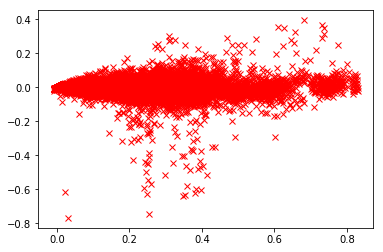

In [20]:
result = pd.read_csv('./data/result.csv', encoding='utf-8')
station_numbers = result['station_number'].tolist()

for i in range(len(station_numbers)):
    
    station_number = station_numbers[i]
    result = pd.read_csv('./data/result.csv', encoding='utf-8')
    
    # skip stations already processed
    if result[result['station_number'] == station_number].at[i, 'SMAPE'] != 0.0:
        continue
        
    print("Now processing station number %d" % station_number)
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    df = pd.read_csv('./data/departure/%d_2008_to_2017.csv' % station_number,encoding='utf-8', dtype='float64')
    data = np.concatenate(scaler.fit_transform(df.values.reshape(-1,1))) # 스케일링을 트레이닝의 값에 대해서만 적용해야 한다는 기사 발견
    
    SMAPE, RMSE = run_model(data)
    
    result.loc[result.station_number == station_number, 'SMAPE'] = SMAPE
    result.loc[result.station_number == station_number, 'RMSE'] = RMSE
    
    result.to_csv('./data/result.csv', index=False)

In [ ]:
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'val'], loc='upper left')
#plt.show()